<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Area Kebakaran Hutan Menggunakan Model Support Vector Machine**

Kelompok : 4

* Vicky Aditia - 120450032

* Zidan Wirawan - 120450044

* Adisya Ridia Nurahma - 120450056

* Angga Pramana Putra Wibowo - 120450084

* Junpito Salim - 120450086





## Import Library 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for statistical data visualization
%matplotlib inline

## Mendefini Dataset

In [ ]:
df = pd.read_csv("/content/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Dimensi Dataset

In [ ]:
df.shape

(517, 13)

## Info Dataset

In [ ]:
df.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

## Memastikan Apakah Ada Data Null?

In [ ]:
df.isnull

<bound method DataFrame.isnull of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [ ]:
df.describe(include ='object')

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


## Menghitung Jumlah data dari Atribut

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

## Persentase distribusi dari jumlah data pada Atribut

In [ ]:
persen1 = df.value_counts().mul(100).round(1).astype(str) + '%'
persen1

X  Y  month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area 
4  3  aug    wed  92.1  111.2  654.1  9.6   20.4  42  4.9   0.0   0.00     200%
3  4  aug    sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00     200%
4  4  mar    sat  91.7  35.8   80.8   7.8   17.0  27  4.9   0.0   28.66    200%
3  6  jun    fri  91.1  94.1   232.1  7.1   19.2  38  4.5   0.0   0.00     200%
6  5  jun    mon  90.4  93.3   298.1  7.5   19.1  39  5.4   0.0   3.52     100%
                                                                           ... 
3  5  mar    tue  88.1  25.7   67.6   3.8   14.9  38  2.7   0.0   0.00     100%
             mon  87.6  52.2   103.8  5.0   9.0   49  2.2   0.0   0.00     100%
      aug    sat  93.5  139.4  594.2  20.3  17.6  52  5.8   0.0   0.00     100%
   4  sep    wed  91.2  134.7  817.5  7.2   18.5  30  2.7   0.0   0.00     100%
9  9  jul    tue  85.8  48.3   313.4  3.9   18.0  42  2.7   0.0   0.36     100%
Length: 513, dtype: object

# Data Statistik dari Dataset

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Data Visualisasi

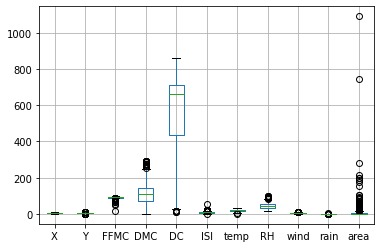

In [ ]:
# Boxplot
df.boxplot()

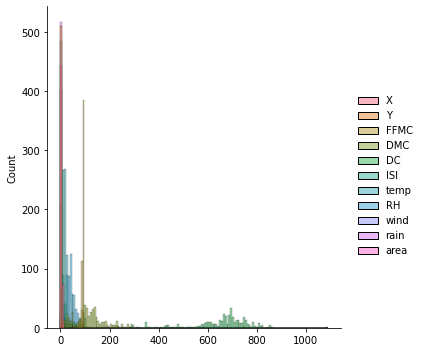

In [ ]:
#Skewness
sb.displot(df)

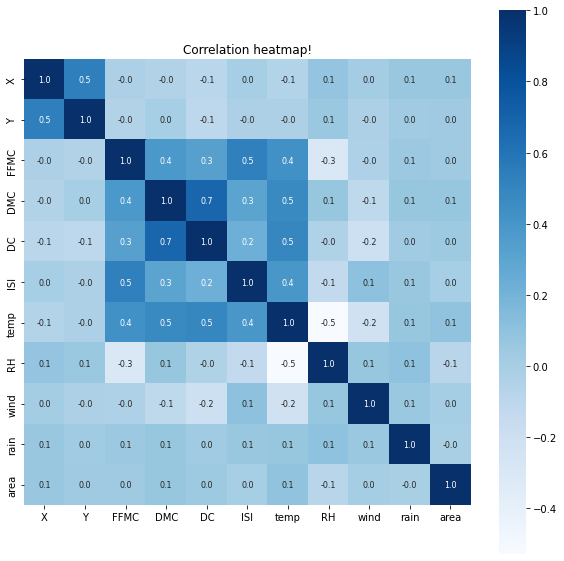

In [ ]:
# Headmap
corr = df.corr()
# Let's create a heatmap!
plot = plt.figure(figsize=(10,10))
plt.title('Correlation heatmap!')
sb.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Modeling data

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Split Data

In [ ]:

X = df.drop(columns=['area','month','day'],axis=1)
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [ ]:
y = df['area'].apply(lambda y_value: 1 if y_value>=7 else 0 )
y

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    1
514    1
515    0
516    0
Name: area, Length: 517, dtype: int64

### Seleksi Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### SVM Modelling dengan Kernel "rbf" dan "linear" dengan C = 1


In [ ]:

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.77
The accuracy of the SVM classifier on test data is 0.79


In [ ]:
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.77
The accuracy of the SVM classifier on test data is 0.79


jadi akurasi dari kernel rbf maaupun linier adaalah sama yaitu seperti yang tertera di atas
